## Name: Yashaswini Joshi
## Unique Name: yjoshi

### Part 1: Data Exploration

In [126]:
# load all libraries
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

In [2]:
dating = pd.read_csv('trainML.csv', encoding="ISO-8859-1")
dating.head(5)

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
0,0,0,0,29.0,3.0,20.0,25.0,15.0,15.0,53.0,...,9.0,8.0,2.0,6.0,2.0,3.0,2.0,355,150,15.0
1,0,0,0,22.0,6.0,20.0,15.0,20.0,20.0,5.0,...,9.0,8.0,3.0,9.0,9.0,7.0,2.0,355,214,15.0
2,0,0,0,27.0,1.0,21.0,17.0,22.0,20.0,8.0,...,9.0,8.0,3.0,7.0,5.0,3.0,NaN,355,515,15.0
3,0,1,1,28.0,2.0,50.0,10.0,30.0,10.0,0.0,...,9.0,8.0,5.0,10.0,8.0,5.0,2.0,355,528,15.0
4,0,1,1,26.0,2.0,25.0,10.0,20.0,20.0,15.0,...,9.0,8.0,4.0,7.0,9.0,9.0,2.0,355,291,15.0


In [4]:
dating.shape

(3808, 61)

In [5]:
dating.describe(include='all')

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
count,3808.000000,3808.000000,3808.000000,3741.000000,3750.000000,3750.000000,3750.000000,3750.000000,3741.000000,3732.000000,...,3750.000000,3750.000000,3711.000000,3670.000000,3666.000000,3647.000000,3640.000000,3808.000000,3808.000000,3732.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.500000,0.164916,0.344013,26.672815,2.885600,22.492333,17.740259,20.402589,17.191165,10.723025,...,7.671467,8.386667,6.274427,7.240736,7.421031,6.407595,0.553846,281.451943,281.451943,11.599033
std,0.500066,0.371153,0.475108,3.847338,1.287227,11.968602,7.567328,7.267267,6.083094,6.288042,...,1.581539,1.017758,1.955501,1.744989,1.509306,1.975880,0.879282,163.573517,163.573517,6.836312
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-28.000000
25%,0.000000,0.000000,0.000000,24.000000,2.000000,15.000000,15.000000,16.000000,14.000000,5.000000,...,7.000000,8.000000,5.000000,6.000000,7.000000,5.000000,0.000000,129.000000,129.000000,8.000000
50%,0.500000,0.000000,0.000000,26.000000,2.000000,20.000000,19.000000,20.000000,18.000000,10.000000,...,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,0.000000,288.000000,288.000000,10.000000
75%,1.000000,0.000000,1.000000,29.000000,4.000000,25.000000,20.000000,25.000000,20.000000,15.000000,...,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,2.000000,434.000000,434.000000,15.000000


Before we begin, it is important to notice that each participants is in the DataFrame multiple times, once for each potential match.

In other words, if I am White and I go on date with 10 participants of the opposite gender, I count as 10 white people. This can bias the analysis and therefore I want to create a second DataFrame with only the unique entries, giving us the real number of participants

In [15]:
#cleaning the data
dating_full = dating.drop_duplicates().copy()
dating_full.head()

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
0,0,0,0,29.0,3.0,20.0,25.0,15.0,15.0,53.0,...,9.0,8.0,2.0,6.0,2.0,3.0,2.0,355,150,15.0
1,0,0,0,22.0,6.0,20.0,15.0,20.0,20.0,5.0,...,9.0,8.0,3.0,9.0,9.0,7.0,2.0,355,214,15.0
2,0,0,0,27.0,1.0,21.0,17.0,22.0,20.0,8.0,...,9.0,8.0,3.0,7.0,5.0,3.0,NaN,355,515,15.0
3,0,1,1,28.0,2.0,50.0,10.0,30.0,10.0,0.0,...,9.0,8.0,5.0,10.0,8.0,5.0,2.0,355,528,15.0
4,0,1,1,26.0,2.0,25.0,10.0,20.0,20.0,15.0,...,9.0,8.0,4.0,7.0,9.0,9.0,2.0,355,291,15.0


In [16]:
dating_full['gender'] = dating_full.gender.map({1 : 'Male', 0 : 'Female'}).fillna(dating_full.gender)
dating['gender'] = dating.gender.map({1 : 'Male', 0 : 'Female'}).fillna(dating.gender)
dating_full.gender.value_counts(dropna=False)

Female    1904
Male      1904
Name: gender, dtype: int64

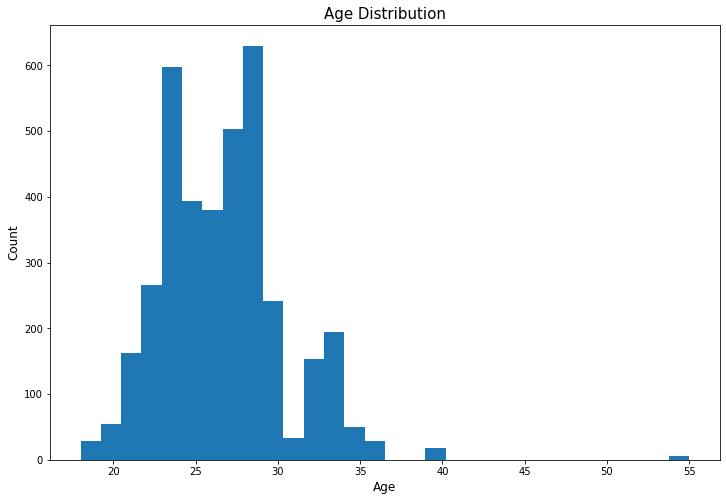

In [17]:
ax = dating_full.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

So most of the participants were in their mid twenties to early thirties.

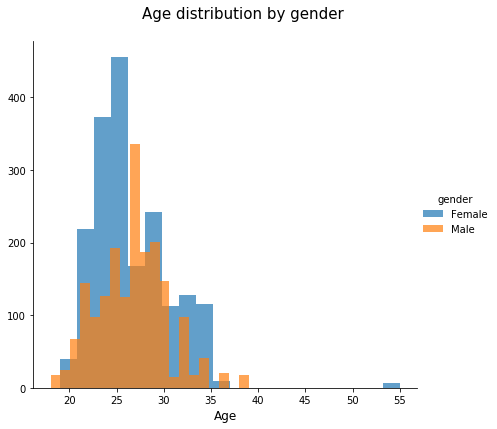

In [18]:
g = sns.FacetGrid(dating_full, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

In [19]:
dating_full[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.537513   26.0  19.0  55.0  1866
Male    26.807467   27.0  18.0  39.0  1875

The different count might be due to the presence of some NaN's in the age feature

In [20]:
dating_full['race'] = dating.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(dating_full.race)
dating['race'] = dating_full.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(dating.race)
dating['race_o'] = dating_full.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(dating.race_o)
dating_full.race.value_counts(dropna=False)

White       1950
Asian        951
Hispanic     384
Other        300
Black        165
NaN           58
Name: race, dtype: int64

Here we can see that there is mostly Caucasian participants, then Asian. It could either be a cultural thing or that these events were organized in specific areas with this demographic.

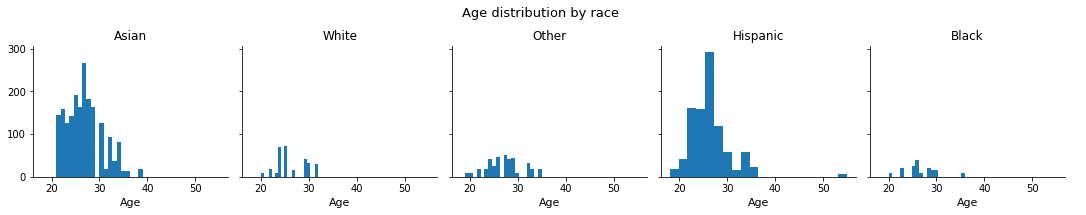

In [24]:
g = sns.FacetGrid(dating_full, col='race', height=3)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [22]:
dating_full[['race', 'age']].groupby('race').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
               mean median   min   max count
race                                        
Asian     26.473186   26.0  18.0  55.0   951
Black     26.600000   26.0  20.0  36.0   165
Hispanic  27.109375   27.0  19.0  35.0   384
Other     26.240000   25.0  20.0  32.0   300
White     26.757342   27.0  21.0  39.0  1941

The Asian participants are younger, while Black and Hispanic participants are older on average.



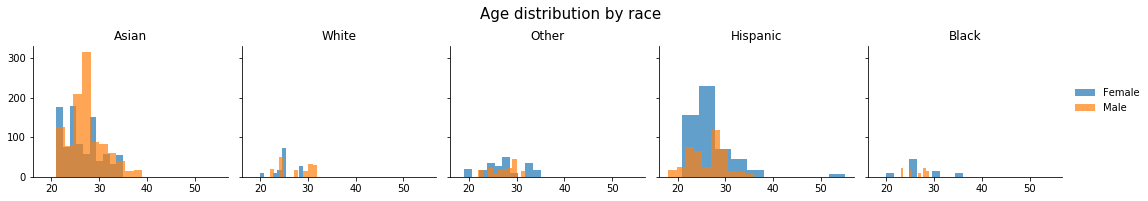

In [25]:
g = sns.FacetGrid(dating_full, col='race', hue='gender')
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.add_legend()
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=15)

g._legend.set_title('')

For Asianrace, more males than females, while we have the opposite trend for every other race. Moreover, for this races, we can observe that males tend to be much older on average.

In [219]:
# creating an object- free data frame
date = dating_full.dropna()
date = dating_full.drop(['field', 'from', 'career','gender','race_o'], axis=1)

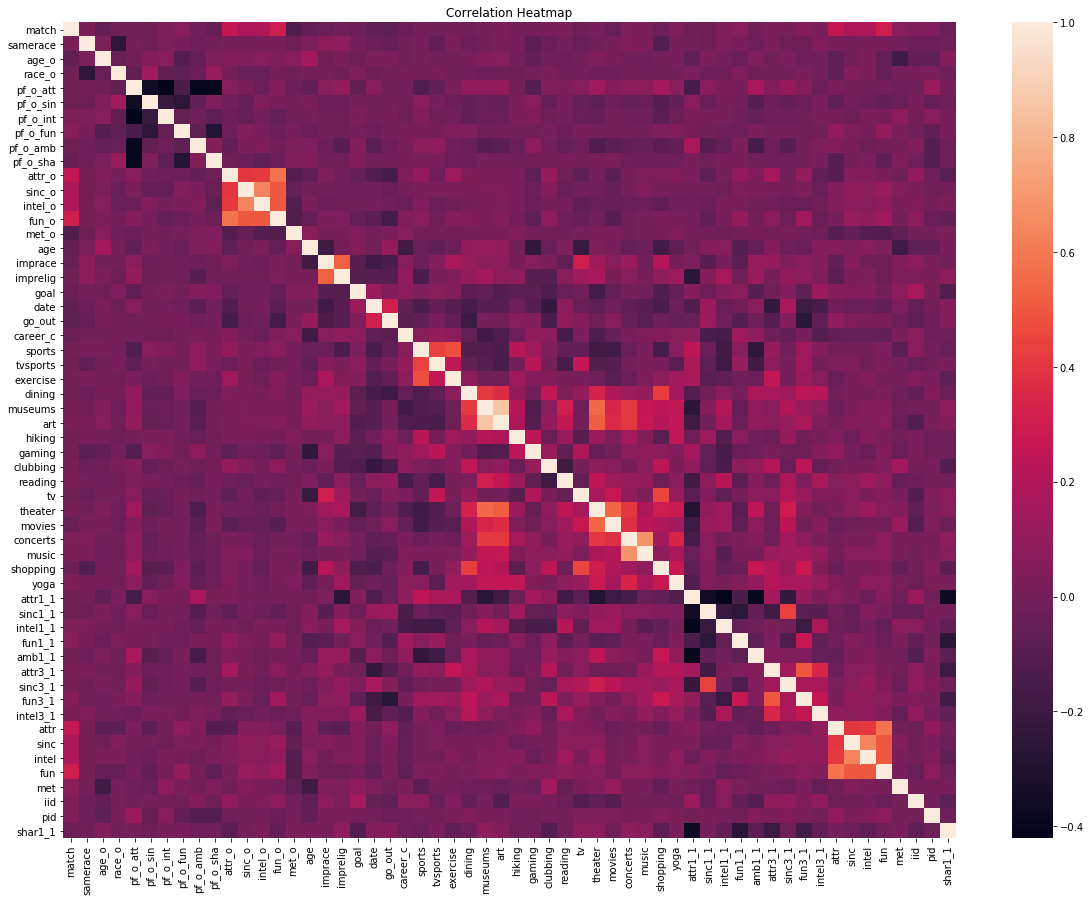

In [199]:
# heat map
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = date.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

This correlation heatmap can be understood better with the help of SpeedDatingDataKey.pdf provided.Since many of the varibles such as attr1_1 and amb1_1 are described there. 

While looking at the heatmap above, there are some interesting observations:

For example, men (gender = 1) seem to have a preference for attractive partners (attr1_1) while women (gender = 0) seem to have a preference for ambitious partners (amb1_1)! 

In other terms, women like shopping and yoga and men like gaming, so at least we know this heatmap is working. Let's look into the interests some more!

This heatmap also helps us in undertsanding what aspects should we be considering while building the model.

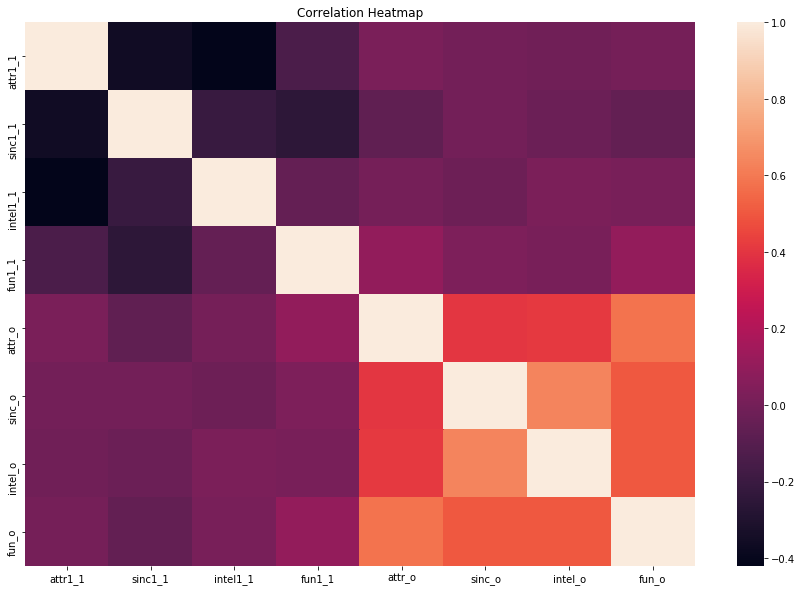

In [203]:
d = pd.concat([date['attr1_1'],date['sinc1_1'],date['intel1_1'],date['fun1_1'],date['attr_o'],
                   date['sinc_o'],date['intel_o'],date['fun_o']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = d.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

It also looks like typically, your own opinion of how attractive you are (attr1_1) is only weakly correlated with how attractive your date finds you (attr_o)! And in fact, there is nearly no correlation between how smart or sincere you think you are versus how smart and sincere your date thinks of you! Perhaps these are tough qualities to get across in a quick date!

So that brings up the question, between attractiveness, sincerity, intelligence, fun, and ambition, what was the most influential in the final decision? I'll run a few machine learning models to figure that out (Part2).

### Part 2: Predicting Matches

The machine learning models that I will be comapring to decide on best performing predicting mathces are as follows:
- Logistic Regression
- Random Forest
- Gradient Boosting Classifier (XGB)
- Multi-layer perceptron (MLP)
- Support Vector Classifier (SVC) 

I am considering the following columns from the dataset for predicting matches: age of partner, partner’s stated preference at Time 1 (attr1_1) for Attractive, partner’s stated preference at Time 1 (attr1_1) for Sincere, partner’s stated preference at Time 1 (attr1_1) for Ambitious, partner’s stated preference at Time 1 (attr1_1) for Share Hobby, rating by partner the night of the event, for Sincere, rating by partner the night of the event, for Attractive, rating by partner the night of the event, for Intelligent, Attractive, Sincere, Intelligent, Fun as there are the features that stood out after feature engineering. 

In [131]:
# preparing the data
X = dating[['age_o','pf_o_att','pf_o_sin','pf_o_amb','pf_o_sha','attr_o','sinc_o','intel_o','fun_o','attr','sinc','intel','fun','met']]
y = dating['match']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)
y = imp.fit_transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [132]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))
print('F1 Score: ',f1_score(predict_test_lrc, y_test, average='weighted'))

Training Accuracy: 0.8509520682862771
Validation Accuracy: 0.8451443569553806
F1 Score:  0.8708855792888323


C:\Users\yashu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Without knowing what the partner's decision is (dec_o), it turns out that given how much the respondent likes the partner and what the respondent's decision is, we have about an 85% accuracy in predicting a match on both the training and the validation using logistic regression. This makes sense given that we know only 26% of people were heartbroken -- if you like someone, odds are they will like you back!

Let's try some other models to see if we can get closer to predicting a match.

In [133]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))
print('F1 Score: ',f1_score(predict_test_lrc, y_test, average='weighted'))

C:\Users\yashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Accuracy: 0.9996717005909389
Validation Accuracy: 0.8556430446194225
F1 Score:  0.8708855792888323


In [251]:
predict_rf = np.concatenate((predict_train_rf, predict_test_rf))

In [252]:
predict_rf.shape

(3808,)

Random forest gave us a more accurate model at 99.9% accuracy in train and 85.5% in test.

In [134]:
# xgboost model
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))
print('F1 Score: ',f1_score(predict_test_lrc, y_test, average='weighted'))

C:\Users\yashu\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.886736703873933
Validation Accuracy: 0.8556430446194225
F1 Score:  0.8708855792888323


XGB gave us a slightly more accurate model than Logistic regression at 88.6% accuracy in train and 85.5% in test.

In [135]:
# Support Vector Classifier (SVC) model
model = SVC(class_weight='balanced')
svc_model = model.fit(X_train, y_train)
predict_train_svc = svc_model.predict(X_train)
predict_test_svc = svc_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_svc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_svc))
print('F1 Score: ',f1_score(predict_test_lrc, y_test, average='weighted'))

C:\Users\yashu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.7537754432042022
Validation Accuracy: 0.7244094488188977
F1 Score:  0.8708855792888323


SVC gave us 75.3% accuracy in train and 72.4% in test. I guess it didn't perform that well for SVC. This is certainly not a good choice.

In [136]:
# Multi-layer perceptron (MLP) model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp_model = model.fit(X_train, y_train)
predict_train_mlp = mlp_model.predict(X_train)
predict_test_mlp = mlp_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_mlp))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_mlp))
print('F1 Score: ',f1_score(predict_test_lrc, y_test, average='weighted'))


C:\Users\yashu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.835193696651346
Validation Accuracy: 0.8346456692913385
F1 Score:  0.8708855792888323


MLP is way better compared to SVC with 83.5% accuracy in train and 83.4% in test, which is almost the same. 

Looks like my best performed model is Random Forest and then XGB model. The F1 score is 0.87, which is a good score. 

In [253]:
# final = (dating.loc[:,[i for i in list(dating.columns) if i not in ['match','iid','pid']]])

# rf_predict_final = rf_model.predict(final)
res = pd.DataFrame(predict_rf)
res.index = final.index
res.columns = ["match"]

df = pd.read_csv('testML.csv')
df["match"] = res["match"]
df.to_csv('testML.csv')

### Part 3: Build recommendation Engine

In [262]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import NMF, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

The following are the algorithms for generating missing ratings:
- SVD
- SVD++
- NMF
- KNN

In [254]:
# load train data
trainRec = pd.read_csv("trainRec.csv") 
reader = Reader(sep = ",", rating_scale=(1,10))
data = Dataset.load_from_df(trainRec[['iid','pid','rate']],reader)

In [257]:
# splitting into train and test
import surprise
data_train,data_test = train_test_split(trainRec,test_size = 0.25,random_state = 0)
trainset = (surprise.Dataset.load_from_df(data_train,reader).build_full_trainset())
testset = (surprise.Dataset.load_from_df(data_test,reader).build_full_trainset())

#### SVD

In [258]:
algo = SVD()
svd = algo.fit(trainset)

In [259]:
testset_surprise = testset.build_testset()

In [260]:
predictions = svd.test(testset_surprise)

In [263]:
accuracy.mae(predictions,verbose=True)

MAE:  0.1538


0.15383906765833982

The MAE for SVD looks good in comaprison to the value given in the rubrics. Let's see if we can tune some hyperparameters and bring this below 0.15.

Tuning hyperparameters for SVD

In [266]:
params = {'n_epochs': [10,20,30],
         'lr_all':[0.002,0.005,0.01],
         'reg_all':[0.4,0.6,0.8]}

grid = GridSearchCV(algo_class=SVD, param_grid = params, measures=['mae'], cv=3)
grid.fit(data)

print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.2880380629251745
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.4}


In [268]:
tuned_svd = SVD(n_epochs = 30, lr_all = 0.005, reg_all = 0.4)
final_svd = tuned_svd.fit(trainset)
testset_surprise = testset.build_testset()
predictions = tuned_svd.test(testset_surprise)
accuracy.mae(predictions,verbose=True)

MAE:  0.2891


0.2890704982179218

We can see that the tuning was not that helpful and the MAE has increased which is not good. Let's check other algorithms.

#### SVD++

In [269]:
algo1 = SVDpp()
svdpp = algo1.fit(trainset)
testset_surprise = testset.build_testset()
predictions = svdpp.test(testset_surprise)
accuracy.mae(predictions,verbose=True)

MAE:  0.1272


0.1272417973365515

The MAE for SVD++ looks good. It's actually a good score compared to SVD.

#### NMF

In [270]:
algo2 = NMF()
nmf = algo2.fit(trainset)
testset_surprise = testset.build_testset()
predictions = nmf.test(testset_surprise)
accuracy.mae(predictions,verbose=True)

MAE:  0.9668


0.9668325677014149

MAE is basically results of measuring the difference between two continuous variables. 0.96 is really a good score.

#### KNN

In [271]:
sim_options = {"name":"cosine","user_based":False}

algo3 = KNNWithMeans(sim_options=sim_options)
knn = algo3.fit(trainset)
testset_surprise = testset.build_testset()
predictions = knn.test(testset_surprise)
accuracy.mae(predictions,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.1223


0.12227789496899104

KNN's MAE is good compared to SVD++. Let's consider this for test dataset. 

In [278]:
predictions

[Prediction(uid=246, iid=440, r_ui=6.800000000000002, est=6.415689731127166, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=340, r_ui=6.4, est=6.522969956203712, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=526, r_ui=5.6000000000000005, est=5.80005202040347, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=484, r_ui=5.7, est=5.7501668398402614, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=360, r_ui=5.55, est=5.418284162256109, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=412, r_ui=6.449999999999998, est=5.9545865757555525, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=445, r_ui=6.15, est=6.042840838553378, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246, iid=373, r_ui=6.6400000000000015, est=5.915116507728727, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=246

In [275]:
rating_data = pd.read_csv('testRec.csv')
ratings=[]
for i in range(len(rating_data)):
    estimated_ratings= knn.predict(rating_data['pid'][i],rating_data['iid'][i]).est
    ratings.append(estimated_ratings)

rating_data['rate'] = ratings
rating_data.to_csv('testRec.csv')

References:
- 1. https://www.kaggle.com/khacnghia97/svd-surprise
- 2. https://surprise.readthedocs.io/en/stable/
- 3. https://github.com/VinceKumar/Speed-Dating-Prediction/blob/master/Speed-Dating-Prediction.ipynb